In [1]:
#Imports
from modules.preamble import *

#Load the data - recover the full dataframe from the training, validation & testing dataframes
dfs = []
for filename in ('df_train', 'df_val', 'df_test'):
    df = pd.read_hdf(
        os.path.join(data_base_path, 
                     "modeling_data/{}.hdf".format(filename))
    )
    dfs.append(df)

df = pd.concat(dfs)

C:\Users\s113277\.conda\envs\base2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\s113277\.conda\envs\base2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\s113277\.conda\envs\base2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\s113277\.conda\envs\base2\lib\site-packages\tensorflow\python\frame

# Exploratory statistics

## Features over the full dataframe

In [2]:
#-----Create table with basic descriptive statistics for thesis

df_es = df.reset_index(drop=True).describe(include='all').T

#Drop unnecessary columns & rows
df_es.drop(['unique', 'top', 'freq', 'first', 'last', 
            '25%', '75%'], axis=1, inplace=True)
df_es.drop(['subject_id', 'charttime', 'time to death', 'y', 'deathtime'], inplace=True)

#Create a column with number of missing observations & percentage missing
df_es['count'] = len(df) - df_es['count'] #Convert count to number of missing values
df_es['% missing'] = df_es['count'] / len(df) * 100
df_es.drop('count', axis=1, inplace=True)

#Format all values as floats with two decimals
df_es = df_es.astype(float).apply(lambda x: np.round(x, 2))

C:\Users\s113277\.conda\envs\base2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\s113277\.conda\envs\base2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df_es

,mean,std,min,50%,max,% missing
arterial base excess,-0.16,6.11,-50.00,0.00,31.00,8.12
arterial pco2,42.63,12.35,11.00,40.00,176.00,6.60
arterial ph,7.38,0.08,6.35,7.39,7.75,5.67
arterial po2,103.81,52.54,0.00,96.00,649.00,6.57
bicarbonate,24.05,6.27,5.00,23.54,50.00,0.33
bilirubin,2.70,5.79,0.00,0.70,82.20,5.53
calcium,8.23,0.86,1.80,8.20,27.40,1.21
creatinine,1.96,1.63,0.00,1.40,22.00,0.32
crp,148.65,85.14,1.00,171.60,299.90,85.04
cvp,12.44,5.72,1.00,12.00,35.00,66.97


# Histograms per feature

C:\Users\s113277\.conda\envs\base2\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\s113277\.conda\envs\base2\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


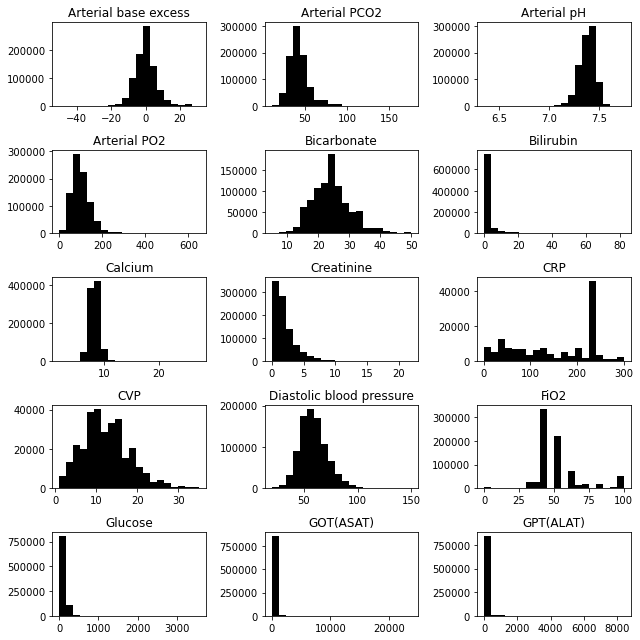

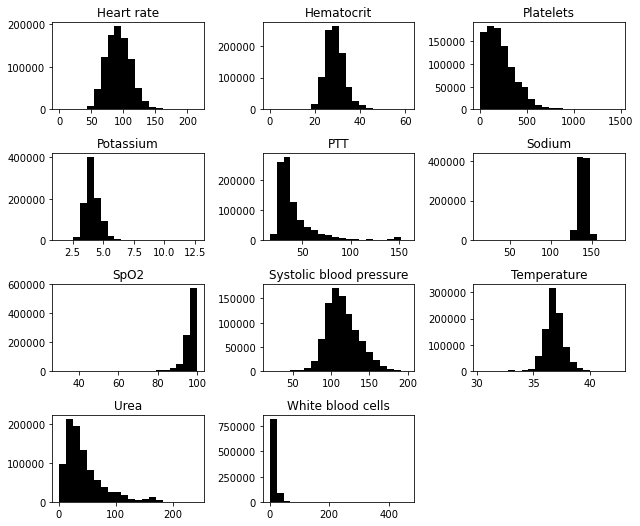

In [5]:
#Properly capitalize features for formatting
properly_capitalized_feats = ['Arterial base excess', 'Arterial PCO2', 'Arterial pH', 'Arterial PO2',
       'Bicarbonate', 'Bilirubin', 'Calcium', 'Creatinine', 'CRP', 'CVP',
       'Diastolic blood pressure', 'FiO2', 'Glucose', 'GOT(ASAT)', 'GPT(ALAT)',
       'Heart rate', 'Hematocrit', 'Platelets', 'Potassium', 'PTT', 'Sodium',
       'SpO2', 'Systolic blood pressure', 'Temperature', 'Urea',
       'White blood cells']
df.rename(columns={c:n for c,n in zip(df.columns[2:-2], properly_capitalized_feats)}, inplace=True)

#Distribute the features over the subplots
feats = df.columns[2:-3].tolist()
i = 0

#Plot 1
fig, ax = plt.subplots(5, 3, figsize=(9,9))
for row in range(5):
    for col in range(3):
        ax[row, col].hist(df[feats[i]], bins=20, color='black')
        ax[row, col].set_title(feats[i])
        i += 1
fig.tight_layout()
# fig.savefig(os.path.join(figs_base_path, 'feat-hists-1.png'), dpi=200)

#Plot 2
fig, ax = plt.subplots(5, 3, figsize=(9,9))
for row in range(5):
    for col in range(3):
        if (i < len(feats)):
            ax[row, col].hist(df[feats[i]], bins=20, color='black')
            ax[row, col].set_title(feats[i])
            i += 1
        else:
            fig.delaxes(ax[row, col])
fig.tight_layout()
# fig.savefig(os.path.join(figs_base_path, 'feat-hists-2.png'),
#             dpi=200)

# Boxplots per-feature-per-target-label

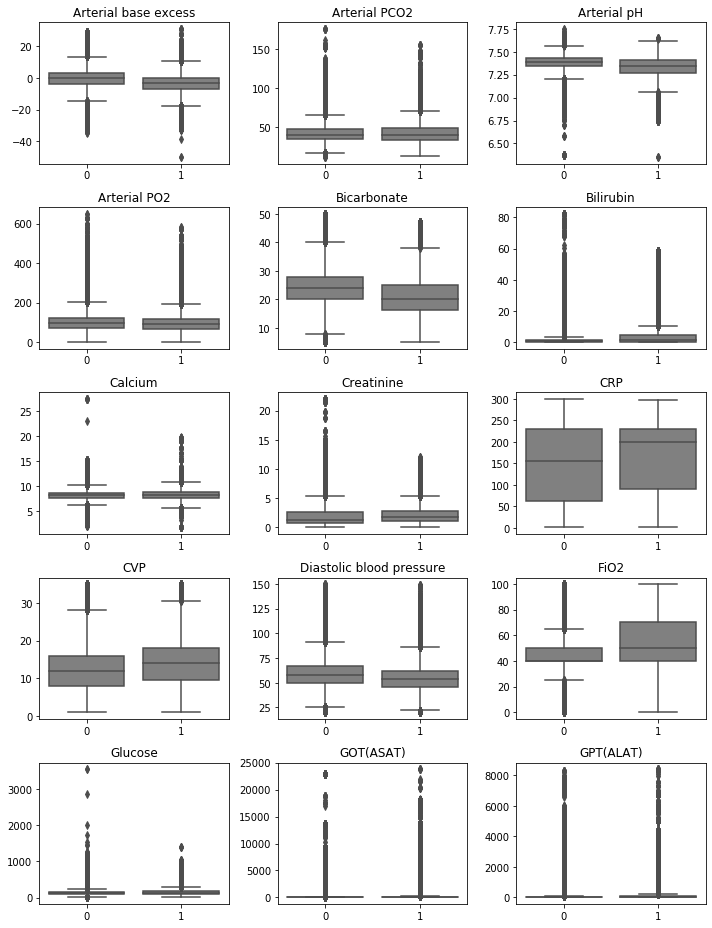

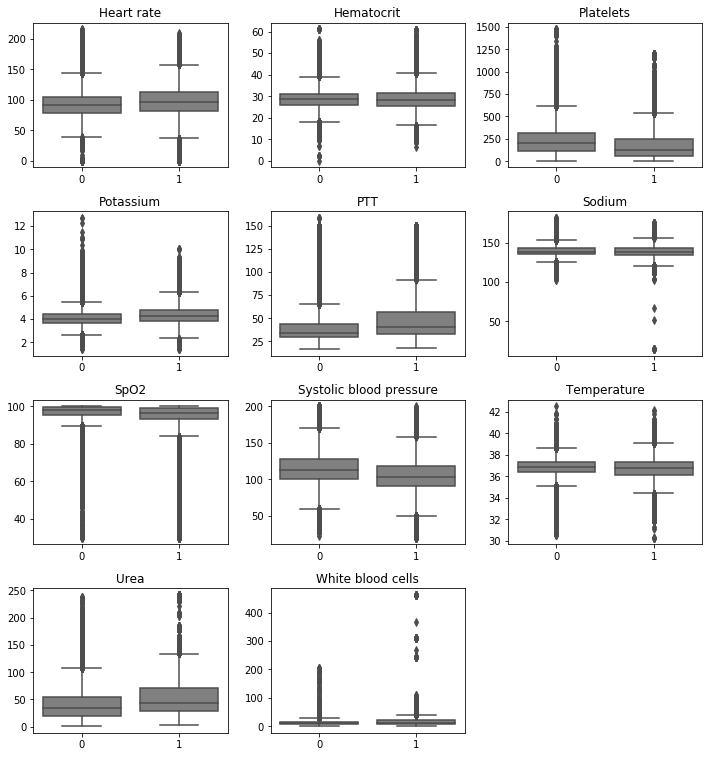

In [10]:
#Properly capitalize features for formatting

#Distribute the features over the subplots
i = 0

#Plot 1
fig, ax = plt.subplots(5, 3, figsize=(10,13))
for row in range(5):
    for col in range(3):
        sns.boxplot(x='y', y=feats[i], data=df, ax=ax[row,col], color='grey')
        ax[row, col].set_title(feats[i])
        ax[row, col].set_xlabel("");
        ax[row, col].set_ylabel("");
        i += 1
fig.tight_layout()
# fig.savefig(os.path.join(figs_base_path, 'feat-label-boxplots-1.png'), dpi=200)

#Plot 2
fig, ax = plt.subplots(5, 3, figsize=(10,13))
for row in range(5):
    for col in range(3):
        if (i < len(feats)):
            sns.boxplot(x='y', y=feats[i], data=df, ax=ax[row,col], color='grey')
            ax[row, col].set_title(feats[i])
            ax[row, col].set_xlabel("");
            ax[row, col].set_ylabel("");
            i += 1
        else:
            fig.delaxes(ax[row, col])
fig.tight_layout()

# fig.savefig(os.path.join(figs_base_path, 'feat-label-boxplots-2.png'),
#             dpi=200)

# Informative Missingness

In [6]:
from sklearn.feature_selection import mutual_info_classif

#Create df with the desired info. True indicates missing, False indicates non-missing
vals = []
feat_cols = df.columns[2:-3]
for col in feat_cols:
    
    #Retrieve means & stds + orrelations of missing & non-missing w.r.t target label
    means = df.groupby(df[col].isnull())['y'].mean().sort_index().values.tolist()
    stds = df.groupby(df[col].isnull())['y'].std().sort_index().values.tolist()
    mi = mutual_info_classif(df[[col]].isnull(), df['y'], discrete_features=True)[0]
    
    #Store outside loop
    vals.append([col] + means + stds + [mi])
dfm = pd.DataFrame(vals)

#Format appropriately for thesis
for col in [1,2,3,4,5]:
    dfm[col] = dfm[col].apply(lambda x: "%.4f" % x)
    
dfm[1] = dfm[1] + " (" + dfm[3] + ")"
dfm[2] = dfm[2] + " (" + dfm[4] + ")"
dfm.drop([3,4], axis=1, inplace=True)
dfm.rename(columns={0: "Variable",
                    1: 'Fraction y=1, not missing (Std)',
                    2: 'Fraction y=1, missing (Std)',
                    5: 'Mutual information of missingness with y'},
            inplace=True)
dfm.sort_values('Mutual information of missingness with y')

,Variable,"Fraction y=1, not missing (Std)","Fraction y=1, missing (Std)",Mutual information of missingness with y
12,Glucose,0.0997 (0.2996),0.0765 (0.2659),0.0000
23,Temperature,0.0994 (0.2992),0.1149 (0.3189),0.0000
22,Systolic blood pressure,0.0997 (0.2997),0.0938 (0.2915),0.0000
21,SpO2,0.0995 (0.2994),0.1084 (0.3110),0.0000
20,Sodium,0.0997 (0.2996),0.0879 (0.2833),0.0000
18,Potassium,0.0997 (0.2996),0.0835 (0.2766),0.0000
17,Platelets,0.0997 (0.2996),0.0843 (0.2779),0.0000
16,Hematocrit,0.0997 (0.2996),0.0825 (0.2752),0.0000
15,Heart rate,0.0998 (0.2997),0.0930 (0.2904),0.0000
24,Urea,0.0997 (0.2997),0.0751 (0.2636),0.0000


In [7]:
#Quick peek at order within loop as a check
df.groupby(df['Arterial base excess'].isnull())['y'].mean().sort_index()

Arterial base excess
False    0.102983
True     0.062075
Name: y, dtype: float64

## Target label statistics

New:

In [8]:
#Overall target label distribution
df['y'].value_counts()

0    832672
1     92171
Name: y, dtype: int64

In [9]:
92171/(92171+832672) #Fraction label y=1 (i.e. mortality within 72h)?

0.09966123979962005

In [10]:
#Per-patient target label distribution
df.groupby('subject_id')['y'].max().value_counts()

0    1473
1     943
Name: y, dtype: int64

In [11]:
943/(1473+943)*100 #Percentage of patients that dies

39.03145695364238

## Instances per patient

In [12]:
#Generate dataframe with desriptive statistics for instances per patient
dfp = df.groupby('subject_id')['y'].count().describe().to_frame()\
        .drop('count').T
dfp.rename(index={'y':'Number of observations per patient'}, inplace=True)
dfp = dfp.apply(lambda x: np.round(x).astype(int))
dfp = dfp.rename(columns={'mean':'Mean', 'std':'Standard Deviation', 
                          '25%':'First Quantile', '50%':'Median', 
                          '75%':'Third Quantile', 'min':'Minimum',
                          'max':'Maximum'})
dfp

,Mean,Standard Deviation,Minimum,First Quantile,Median,Third Quantile,Maximum
Number of observations per patient,383,1368,3,94,191,430,44018


In [22]:
#Let's take a look at the patients with the most observations
df.groupby('subject_id')['y'].count().sort_values(ascending=False).head(10)

subject_id
89840    44018
55639    37890
46156    25813
10694    13726
62239     4734
78076     3653
18992     3218
19911     3039
58662     2810
30202     2804
Name: y, dtype: int64

In [14]:
#Inspecting the most-frequently occuring patient
df[df['subject_id']==89840].tail(200) #i.e. minute-level heart rate measurements. Patient is on icu for 30 days.

,subject_id,charttime,Arterial base excess,Arterial PCO2,Arterial pH,Arterial PO2,Bicarbonate,Bilirubin,Calcium,Creatinine,CRP,CVP,Diastolic blood pressure,FiO2,Glucose,GOT(ASAT),GPT(ALAT),Heart rate,Hematocrit,Platelets,Potassium,PTT,Sodium,SpO2,Systolic blood pressure,Temperature,Urea,White blood cells,deathtime,time to death,y
646005,89840,2192-10-27 12:08:00,0.0,54.0,7.33,51.0,27.0,0.1,9.2,1.0,230.7,NaN,48.500000,100.0,177.0,16.0,8.0,91.000000,26.1,628.0,4.5,34.1,143.0,83.0,87.000000,37.277778,43.0,8.3,2192-10-27 03:20:00,-1 days +15:12:00,1
646006,89840,2192-10-27 12:09:00,0.0,54.0,7.33,51.0,27.0,0.1,9.2,1.0,230.7,NaN,46.500000,100.0,177.0,16.0,8.0,91.000000,26.1,628.0,4.5,34.1,143.0,82.0,83.000000,37.277778,43.0,8.3,2192-10-27 03:20:00,-1 days +15:11:00,1
646007,89840,2192-10-27 12:10:00,0.0,54.0,7.33,51.0,27.0,0.1,9.2,1.0,230.7,NaN,46.000000,100.0,177.0,16.0,8.0,91.000000,26.1,628.0,4.5,34.1,143.0,82.0,80.000000,37.277778,43.0,8.3,2192-10-27 03:20:00,-1 days +15:10:00,1
646008,89840,2192-10-27 12:11:00,0.0,54.0,7.33,51.0,27.0,0.1,9.2,1.0,230.7,NaN,48.833333,100.0,177.0,16.0,8.0,92.666667,26.1,628.0,4.5,34.1,143.0,85.0,73.333333,37.277778,43.0,8.3,2192-10-27 03:20:00,-1 days +15:09:00,1
646009,89840,2192-10-27 12:12:00,0.0,54.0,7.33,51.0,27.0,0.1,9.2,1.0,230.7,NaN,45.000000,100.0,177.0,16.0,8.0,91.500000,26.1,628.0,4.5,34.1,143.0,86.0,70.500000,37.277778,43.0,8.3,2192-10-27 03:20:00,-1 days +15:08:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646200,89840,2192-10-27 15:23:00,0.0,54.0,7.33,51.0,27.0,0.1,9.2,1.0,230.7,NaN,43.000000,100.0,177.0,16.0,8.0,0.000000,26.1,628.0,4.5,34.1,143.0,87.0,82.000000,37.277778,43.0,8.3,2192-10-27 03:20:00,-1 days +11:57:00,1
646201,89840,2192-10-27 15:24:00,0.0,54.0,7.33,51.0,27.0,0.1,9.2,1.0,230.7,NaN,43.000000,100.0,177.0,16.0,8.0,0.000000,26.1,628.0,4.5,34.1,143.0,87.0,82.000000,37.277778,43.0,8.3,2192-10-27 03:20:00,-1 days +11:56:00,1
646202,89840,2192-10-27 15:25:00,0.0,54.0,7.33,51.0,27.0,0.1,9.2,1.0,230.7,NaN,43.000000,100.0,177.0,16.0,8.0,0.000000,26.1,628.0,4.5,34.1,143.0,87.0,82.000000,37.277778,43.0,8.3,2192-10-27 03:20:00,-1 days +11:55:00,1
646203,89840,2192-10-27 15:26:00,0.0,54.0,7.33,51.0,27.0,0.1,9.2,1.0,230.7,NaN,43.000000,100.0,177.0,16.0,8.0,0.000000,26.1,628.0,4.5,34.1,143.0,87.0,82.000000,37.277778,43.0,8.3,2192-10-27 03:20:00,-1 days +11:54:00,1


In [15]:
df[df['subject_id']==89840]['charttime'].duplicated().sum() #Any duplicate timesteps?

0

In [16]:
#How many patients with over 1000 observations?
(df.groupby('subject_id')['y'].count()>1000).sum()

155

# Excel export 
For easier conversion to Latex & later introspection.

In [26]:
# df_es.to_excel(os.path.join(data_base_path, "exploratory data analysis\dfml_basic_stats.xlsx"),
#                float_format = '%.2f')
# dfp.to_excel(os.path.join(data_base_path, "exploratory data analysis\instances_per_patient_stats.xlsx"))
# dfm.to_excel(os.path.join(data_base_path, "exploratory data analysis\informative_missingness.xlsx"))